In [14]:
import pandas as pd
import numpy as np
import networkx as nx
import pickle as pkl

import scipy as sp
import matplotlib.pyplot as plt
import math

from sklearn.cluster import SpectralClustering

In [5]:
with open('../graphs/export_graphs.pkl', 'rb') as file:
    export_graphs = pkl.load(file)

In [50]:
train_graphs = export_graphs[:42]
test_graphs = export_graphs[42:]

In [51]:
train_clusters = []
val_clusters = []

for g in train_graphs:
    # Compute the normalized Laplacian matrix of the graph
    laplacian = nx.normalized_laplacian_matrix(g)

    # Perform spectral clustering
    clustering = SpectralClustering(n_clusters=7, assign_labels='discretize', random_state=0).fit(laplacian.toarray())

    train_clusters.append(clustering.labels_)

/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trad

In [52]:
from sklearn.metrics import adjusted_rand_score

ari_scores_train = []

# Compute the Adjusted Rand Index
for c_1 in train_clusters:
    current_ari_scores = []
    for c_2 in train_clusters:
        ari = adjusted_rand_score(c_1, c_2)
        current_ari_scores.append(ari)
    ari_scores_train.append(current_ari_scores)

In [62]:
train_graph_clustering = SpectralClustering(n_clusters=15, assign_labels='discretize', random_state=0).fit(ari_scores_train)

/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


In [64]:
labels = train_graph_clustering.labels_

In [71]:
centroids = []
for i in np.unique(labels):
    positions = []
    for t, j in enumerate(labels):
        if j == i:
            positions.append(t)
    mean_position = np.mean(positions)

    differences = np.abs(positions - mean_position)

    # Find the value in the array closest to the value
    closest_value = positions[np.argmin(differences)]

    centroids.append(closest_value)


In [72]:
centroids

[2, 19, 27, 11, 33, 24, 39, 9, 5, 17, 10, 31, 21, 35, 25]

In [73]:
change_point_years = []
for i in centroids:
    change_point_years.append(i + 1962)

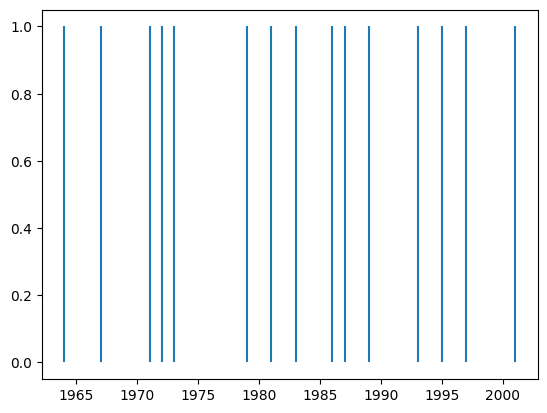

In [75]:
import matplotlib.pyplot as plt

# Assume x_points is your array of x points
x_points = change_point_years

# Create a new figure
plt.figure()

# Draw vertical lines at the x points
for x in x_points:
    plt.vlines(x=x, ymin=0, ymax=1)

# Display the plot
plt.show()